In [1]:
%load_ext autoreload
%autoreload 

In [2]:

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time

os.chdir('/home/ali/packages/s2p-lbm/')
from scipy import stats
import suite2p
from suite3d import plot_utils as plot

/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:
from importlib import reload
from pathlib import Path

In [4]:
from suite3d.job import Job

job = Job('/mnt/md0/runs','SS003_2024-08-06_1-2-3-4-5-6', create=False)

   Found and loaded params from /mnt/md0/runs/s3d-SS003_2024-08-06_1-2-3-4-5-6/params.npy


In [5]:
# timing = {'extraction': 96, 'segmentation': 3*60 + 18, 'corrmap' : 104, 'data_io' :}

In [6]:
import time

In [7]:
# io: 103m5s

In [8]:
%%time
# SAVE DATA FOR s2p Run
tic = time.time()
from suite3d.io.s3dio import s3dio
from suite3d import reference_image as ref
import tifffile

jobio = s3dio(job)

raw_data_path = '/mnt/md0/runs/s2p-SS003_2024-08-06_1-2-3-4-5-6/raw'

os.makedirs(raw_data_path,exist_ok=True)

planes = n.array([ 0,  2,  4,  6,  8, 10, 12, 14,
                        16, 18, 20, 22, 24, 1,  3, 5,  7,9,11, 13, 15,17,19,21])[:20]
fuse_shift = 7
ys, xs = jobio._load_roi_start_pix_lbm(job.params)
for tif in job.tifs:
    print(tif)
    data = jobio.load_data([tif], planes = job.params['planes'])
    out_fname = tif.split('/')[-1].split('.')[0] + f'_{len(planes)}planes.tif'
    out_path = os.path.join(raw_data_path, out_fname)
    data = ref.fuse_mov(data, fuse_shift, n.sort(xs))[0]
    data = n.swapaxes(data,0,1)        
    tifffile.imsave(out_path, data)
toc = time.time()
io_time = toc - tic

[{'uid': '9A1B7D0F2A67F484', 'center': array([0, 0]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': 'D13AC8ABC660883F', 'center': array([2.7, 0. ]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '66DCE42C83645264', 'center': array([5.4, 0. ]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '18B13E686766C950', 'center': array([0, 0]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '305F5B1ABEA43014', 'center': array([-2.7,  0. ]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}, {'uid': '886741FECFC3BCA6', 'center': array([-5.4,  0. ]), 'sizeXY': array([ 2.7  , 16.875]), 'pixXY': array([144, 900])}]
[288 432 576 288 144   0]
/mnt/zortex-subjects/SS003/2024-08-06/1/2024-08-06_1_SS003_2P_00001_00001.tif
      Loading /mnt/zortex-subjects/SS003/2024-08-06/1/2024-08-06_1_SS003_2P_00001_00001.tif
    Loaded file into shared memory in 4.19 sec
    Workers completed in 1.42 sec


In [9]:
# io: 103m5s

In [105]:
raw_data_path = '/mnt/md0/runs/s2p-SS003_2024-08-06_1-2-3-4-5-6/raw'

save_path =  Path( '/mnt/md0/runs/s2p-SS003_2024-08-06_1-2-3-4-5-6/full')

ops = suite2p.default_ops()
ops['look_one_level_down'] = True
ops['subfolders'] = []
ops['nplanes'] = 20
ops['fs'] = 4.12
ops['batch_size'] = 400

ops['threshold_scaling'] = 0.1
ops['tau'] = 1.3
ops['nonrigid'] = False
ops['ignore_flyback'] = []
ops['data_path'] = [raw_data_path]
ops['save_path0'] = str(save_path)
# print(ops)
ops['do_registration'] = 2

In [106]:
%%time
s3d_tic = time.time()
output_ops = suite2p.run_s2p(ops=ops)
s3d_toc = time.time()
s2p_time = s3d_toc - s3d_time

{}
tif
** Found 192 tifs - converting to binary **
1600 frames of binary, time 8.18 sec.
3200 frames of binary, time 11.60 sec.
4800 frames of binary, time 14.62 sec.
6400 frames of binary, time 17.69 sec.
8000 frames of binary, time 20.45 sec.
9600 frames of binary, time 23.48 sec.
11200 frames of binary, time 27.08 sec.
12800 frames of binary, time 32.44 sec.
14400 frames of binary, time 38.34 sec.
16000 frames of binary, time 43.79 sec.
17600 frames of binary, time 50.26 sec.
19200 frames of binary, time 55.94 sec.
20800 frames of binary, time 60.85 sec.
22400 frames of binary, time 66.01 sec.
24000 frames of binary, time 72.08 sec.
25600 frames of binary, time 76.38 sec.
27200 frames of binary, time 83.92 sec.
28800 frames of binary, time 88.78 sec.
30400 frames of binary, time 95.81 sec.
32000 frames of binary, time 102.35 sec.
33600 frames of binary, time 108.61 sec.
35200 frames of binary, time 114.51 sec.
36800 frames of binary, time 119.14 sec.
38400 frames of binary, time 125

/home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/detection/sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 3.14, threshold 1.57 
0 ROIs, score=160.42
1000 ROIs, score=44.92
2000 ROIs, score=37.69
3000 ROIs, score=35.18
4000 ROIs, score=33.92
Detected 5000 ROIs, 143.14 sec
After removing overlaps, 4993 ROIs remain
----------- Total 169.01 sec.
----------- EXTRACTION
Masks created, 5.93 sec.
Extracted fluorescence from 4993 ROIs in 18845 frames, 27.21 sec.
----------- Total 34.61 sec.
----------- CLASSIFICATION
['compact', 'npix_norm', 'skew']
----------- SPIKE DECONVOLUTION
----------- Total 3.24 sec.
Plane 16 processed in 363.97 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 17 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: Applying builtin classifier at /home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/classifiers/classifier.npy
----------- REGISTRATION
Reference frame, 10.34 sec.
Registered 400/18845 in 2.01s
Registered 800/1

/home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/detection/sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 3.14, threshold 1.57 
0 ROIs, score=158.86
1000 ROIs, score=37.85
2000 ROIs, score=34.37
3000 ROIs, score=33.39
4000 ROIs, score=33.01
Detected 5000 ROIs, 133.79 sec
After removing overlaps, 5000 ROIs remain
----------- Total 159.97 sec.
----------- EXTRACTION
Masks created, 5.81 sec.
Extracted fluorescence from 5000 ROIs in 18845 frames, 27.20 sec.
----------- Total 34.50 sec.
----------- CLASSIFICATION
['compact', 'npix_norm', 'skew']
----------- SPIKE DECONVOLUTION
----------- Total 3.27 sec.
Plane 17 processed in 353.73 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 18 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: Applying builtin classifier at /home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/classifiers/classifier.npy
----------- REGISTRATION
Reference frame, 9.90 sec.
Registered 400/18845 in 1.98s
Registered 800/18

/home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/detection/sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 3.14, threshold 1.57 
0 ROIs, score=102.47
1000 ROIs, score=35.92
2000 ROIs, score=33.63
3000 ROIs, score=33.12
4000 ROIs, score=32.84
Detected 5000 ROIs, 140.28 sec
After removing overlaps, 5000 ROIs remain
----------- Total 165.83 sec.
----------- EXTRACTION
Masks created, 5.83 sec.
Extracted fluorescence from 5000 ROIs in 18845 frames, 26.94 sec.
----------- Total 34.25 sec.
----------- CLASSIFICATION
['compact', 'npix_norm', 'skew']
----------- SPIKE DECONVOLUTION
----------- Total 3.25 sec.
Plane 18 processed in 365.15 sec (can open in GUI).
>>>>>>>>>>>>>>>>>>>>> PLANE 19 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: Applying builtin classifier at /home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/classifiers/classifier.npy
----------- REGISTRATION
Reference frame, 10.32 sec.
Registered 400/18845 in 1.97s
Registered 800/1

/home/ali/anaconda3/envs/suite2p/lib/python3.9/site-packages/suite2p/detection/sparsedetect.py:286: UserWarning: Spatial scale estimation failed.  Setting spatial scale to 1 in order to continue.
  warn(


NOTE: FORCED spatial scale ~6 pixels, time epochs 3.14, threshold 1.57 
0 ROIs, score=133.34
1000 ROIs, score=34.77
2000 ROIs, score=33.32
3000 ROIs, score=32.95
4000 ROIs, score=32.72
Detected 5000 ROIs, 142.45 sec
After removing overlaps, 4999 ROIs remain
----------- Total 167.93 sec.
----------- EXTRACTION
Masks created, 5.83 sec.
Extracted fluorescence from 4999 ROIs in 18845 frames, 27.14 sec.
----------- Total 34.44 sec.
----------- CLASSIFICATION
['compact', 'npix_norm', 'skew']
----------- SPIKE DECONVOLUTION
----------- Total 3.24 sec.
Plane 19 processed in 365.28 sec (can open in GUI).
total = 8887.76 sec.
Creating combined view
appended plane 0 to combined view
appended plane 1 to combined view
appended plane 2 to combined view
appended plane 3 to combined view
appended plane 4 to combined view
appended plane 5 to combined view
appended plane 6 to combined view
appended plane 7 to combined view
appended plane 8 to combined view
appended plane 9 to combined view
appended plan

NameError: name 's3d_time' is not defined

In [111]:
# runtime 8980.87

8980.87

In [ ]:
# plane_time = 59.89

In [10]:
time_s2p

NameError: name 'time_s2p' is not defined

In [ ]:
time_s3d

In [98]:
timings_s2p_plane = {
    # 'init' : 11.7,
    'mcorr' :156.43,
    'detect' : 182.28,
    'extract' : 35.06,
}
plane_time_s2p = 378 #59.9 * 192 / 9

time_s2p = plane_time_s2p * 20

timings_s3d = {
    'init' : 5*60 + 2,
    'mcorr' : 73 * 60,
    'detect' : 18 * 60,
    'segment' : 143 * 60,
    'extract' : 3642,
}
time_s3d = n.sum(timings_s3d[k] for k in timings_s3d.keys())

/tmp/ipykernel_529680/3047596321.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  time_s3d = n.sum(timings_s3d[k] for k in timings_s3d.keys())


In [99]:
timings_s3d_frac = {}
for k in timings_s3d.keys():
    timings_s3d_frac[k] = timings_s3d[k] / sum((list(timings_s3d.values())))

timings_s2p_frac = {}
timings_s2p = {}
for k in timings_s2p_plane.keys():
    timings_s2p_frac[k] = timings_s2p_plane[k] / sum((list(timings_s2p_plane.values())))
    timings_s2p[k] = time_s2p * timings_s2p_frac[k]
timings_s2p['io'] = 103*60 + 5

Text(0.5, 0, 'Hours')

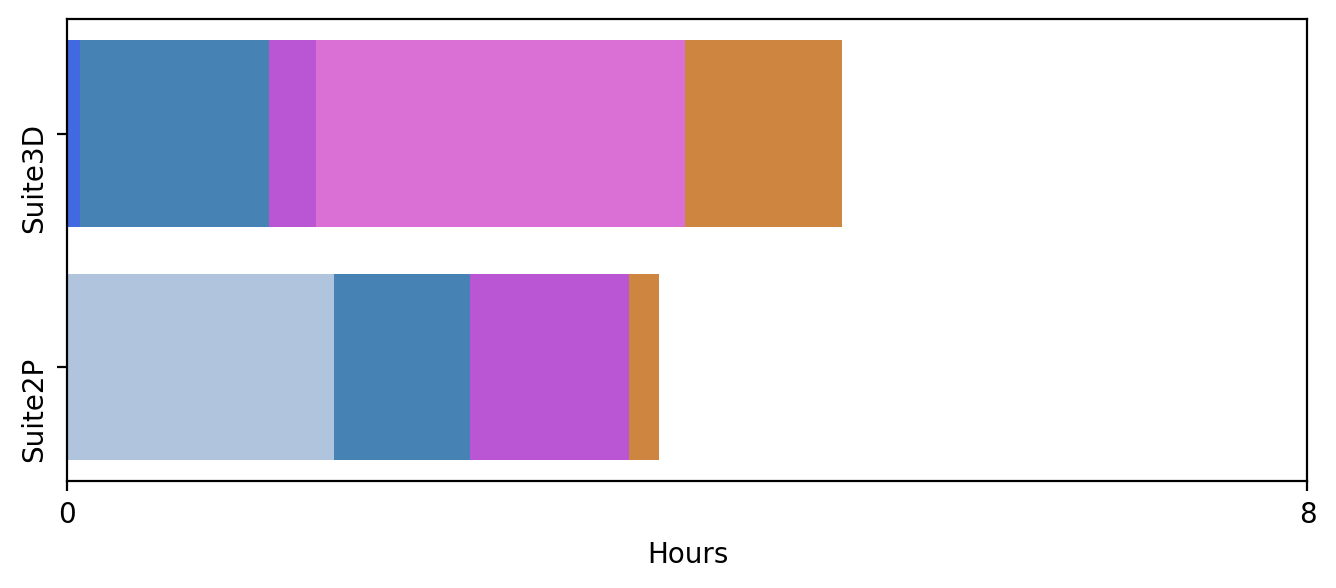

In [100]:
f,ax = plt.subplots(figsize=(8,3),dpi=200)
posy = n.zeros(2)
posx = [1,2]
colors = {'init' : 'royalblue',
          'mcorr': 'steelblue',
           'detect' : 'mediumorchid',
           'segment' : 'orchid',
           'extract' : 'peru',
            'io' : 'lightsteelblue'}
all_keys = ['io','init', 'mcorr', 'detect', 'segment', 'extract'] #n.unique(list(timings_s3d.keys()) + list(timings_s2p.keys()))
for key in all_keys:
    s2pval = timings_s2p.get(key,0) / 3600
    s3dval = timings_s3d.get(key,0) / 3600
    ax.barh(posx, [s2pval, s3dval], left=posy, color=colors.get(key, 'k'))
    posy[0] += s2pval
    posy[1] += s3dval
ax.set_yticks(posx, ['Suite2P', 'Suite3D'], rotation=90)
ax.set_xticks([0,8])
ax.set_xlabel("Hours")
# plt.savefig(fig_dir / 'timing_s2p-s3d.svg',dpi=200, pad_inches =0, bbox_inches='tight')

In [9]:
25557/76

336.2763157894737

In [41]:
time_s2p

25557.333333333332

In [42]:
time_s3d

22124

In [39]:
timings_s2p_frac

{'mcorr': 0.5951960438007771,
 'detect': 0.27393147297774634,
 'extract': 0.13087248322147652}

In [40]:
timings_s3d_frac

{'init': 0.013650334478394503,
 'mcorr': 0.19797504971976135,
 'detect': 0.23594286747423612,
 'segment': 0.38781413849213525,
 'extract': 0.1646176098354728}

In [14]:
plane_times = {'init' : 11, 'mcorr' : 28 + 29, 'segmentation' : 33, 'extraction' : 10}
plane_total = sum([plane_times[k] for k in plane_times])

In [15]:
total_time = 12*60 + 56
timings = {k : total_time * plane_times[k] / plane_total for k in plane_times.keys()}

In [16]:
timings_3d = {'extraction': 96, 'segmentation': 3*60 + 18, 'corrmap' : 104, 'init' : 127, 'mcorr' : 7*60+54 }

In [17]:
total_time_3d = sum(timings_3d[k] for k in timings_3d.keys())

In [36]:
all_ops = []
all_stats = []
Fs = []
spks = []
iscell = []
for plane in n.arange(ops['nplanes']):
    planedir = (save_path / 'suite2p' / f'plane{plane}')
    statx = planedir / 'stat.npy'
    opx = planedir / 'ops.npy'
    Fsx = planedir / 'F.npy'
    spksx = planedir / 'spks.npy'
    iscellx = planedir / 'iscell.npy'
    
    all_stats.append(n.load(statx, allow_pickle=True))
    all_ops.append(n.load(opx, allow_pickle=True).item())
    Fs.append(n.load(Fsx))
    spks.append(n.load(spksx))
    iscell.append(n.load(iscellx))

iscell = n.concatenate(iscell).astype(bool)

mean_img = n.stack([op['meanImg'] for op in all_ops])

ref_img = n.stack([op['refImg'] for op in all_ops])


# corr_map = n.stack([op['Vcorr'] for op in all_ops])

nz = mean_img.shape[0]

In [37]:
Fs = n.concatenate(Fs)[iscell[:,0]]
spks = n.concatenate(spks)[iscell[:,0]]

In [38]:
save_path

PosixPath('/mnt/md0/runs/s2p-SS003_2024-08-06_2')

In [39]:
n.save(save_path / 'F.npy', Fs)
n.save(save_path / 'spks.npy', spks)